1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

x1 = np.random.normal(loc = 0, scale = 1, size = 1000)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = 1000)
x3 = 2*x1 + x2

data = np.array([x1, x2, x3])
print('Data =', data)

## Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix ##

print('\n!!! Covariance matrix !!!')
cov_matrix = np.cov(data, bias=True)

l, V = la.eig(cov_matrix)
real_l = np.real_if_close(l)
print("Real(eigenvalues):\n",real_l , '\n')
# V is the matrix of the eigenvectors
print("Eigenvectors:\n", V, '\n')

## Eigenvectors and eigenvalues using the SVD. ##
print('\n!!! SVD !!!')
U, s, Vt = la.svd(data)
print("Square root of the eigenvalues of  𝐴.T*𝐴:\n", s, '\n')
print("Eigenvectors of A*A.T:\n", U, '\n')
print("Eigenvectors of A.T*A:\n", Vt, '\n')

# Rescale the SVD spectrum to get the eigenvalues
n = 1000
l_svd = s**2/(n-1)
# The matrix U already contains the eigenvectors
V_svd = U

# Compare Eigenvalues
print('! Compare Eigenvalue ! \n')
print("Eigendecomposition:\n", real_l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print('\n! Compare Eigenvectors ! \n')
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

# We observe that U has the same values of V using the covariance matrix but not in the same order 
# (the 2nd and 3rd column are inversed).


Data = [[-0.36149229 -0.27405283 -0.40005391 ...  0.08096306  1.16259216
  -0.65357962]
 [ 3.82603915 -0.26670278  3.81675241 ...  0.64318186 -1.33609471
  -0.49622432]
 [ 3.10305457 -0.81480843  3.0166446  ...  0.80510798  0.98908961
  -1.80338357]]

!!! Covariance matrix !!!
Real(eigenvalues):
 [ 2.84195585e+01 -1.13955079e-16  1.93745441e+00] 

Eigenvectors:
 [[-0.11225198 -0.81649658  0.56633279]
 [-0.5813612  -0.40824829 -0.70381282]
 [-0.80586516  0.40824829  0.42885275]] 


!!! SVD !!!
Square root of the eigenvalues of  𝐴.T*𝐴:
 [1.68785282e+02 4.40291751e+01 6.78842612e-15] 

Eigenvectors of A*A.T:
 [[-0.1124391   0.56629567 -0.81649658]
 [-0.58112862 -0.70400487 -0.40824829]
 [-0.80600681  0.42858646  0.40824829]] 

Eigenvectors of A.T*A:
 [[-2.77503941e-02  4.99180971e-03 -2.72800945e-02 ... -6.11307635e-03
  -8.97536184e-04  1.07556623e-02]
 [-3.56203481e-02 -7.19183894e-03 -3.68089581e-02 ... -1.40578957e-03
   4.59445017e-02 -1.80262462e-02]
 [ 5.93619139e-01  4.53551162e-0

In [3]:
# percentage of variability
Lambda = np.diag(real_l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov_matrix):\n", cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()))

# We can remove the component 1 (the second component) as it doesn't retain any percentage of the overall variability. 
# Then we retain at least 99% of the total variability.

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained
# We can keep only the 1st and 3rd component that represent well the original points.
# We reduced the dimension shape into 2 dimensions.
data_reduced = np.array([x1, x3])
print('Data reduced: \n ', data_reduced)

Lambda:
 [[ 2.84195585e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.13955079e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.93745441e+00]] 

Trace(cov_matrix):
 30.35701288796338 

Trace(Lambda):
 30.357012887963364 

By selecting the component 0, we retain 0.94% of the total variability
By selecting the component 1, we retain -0.00% of the total variability
By selecting the component 2, we retain 0.06% of the total variability
Data reduced: 
  [[-0.36149229 -0.27405283 -0.40005391 ...  0.08096306  1.16259216
  -0.65357962]
 [ 3.10305457 -0.81480843  3.0166446  ...  0.80510798  0.98908961
  -1.80338357]]


Eigenvalue: (28.4195584819452+0j) ,	eigenvector: [-0.11225198 -0.5813612  -0.80586516]
Eigenvalue: (-1.1395507879054154e-16+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: (1.9374544060181653+0j) ,	eigenvector: [ 0.56633279 -0.70381282  0.42885275]
Eigenvalue: (28.4195584819452+0j) ,	eigenvector: [ 1.00000000e+00 -3.49461966e-16 -1.46535298e-16]
Eigenvalue: (-1.1395507879054154e-16+0j) ,	eigenvector: [-3.49461966e-16  1.00000000e+00 -2.52019649e-16]
Eigenvalue: (1.9374544060181653+0j) ,	eigenvector: [-1.46535298e-16 -2.52019649e-16  1.00000000e+00]


/Users/anais/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


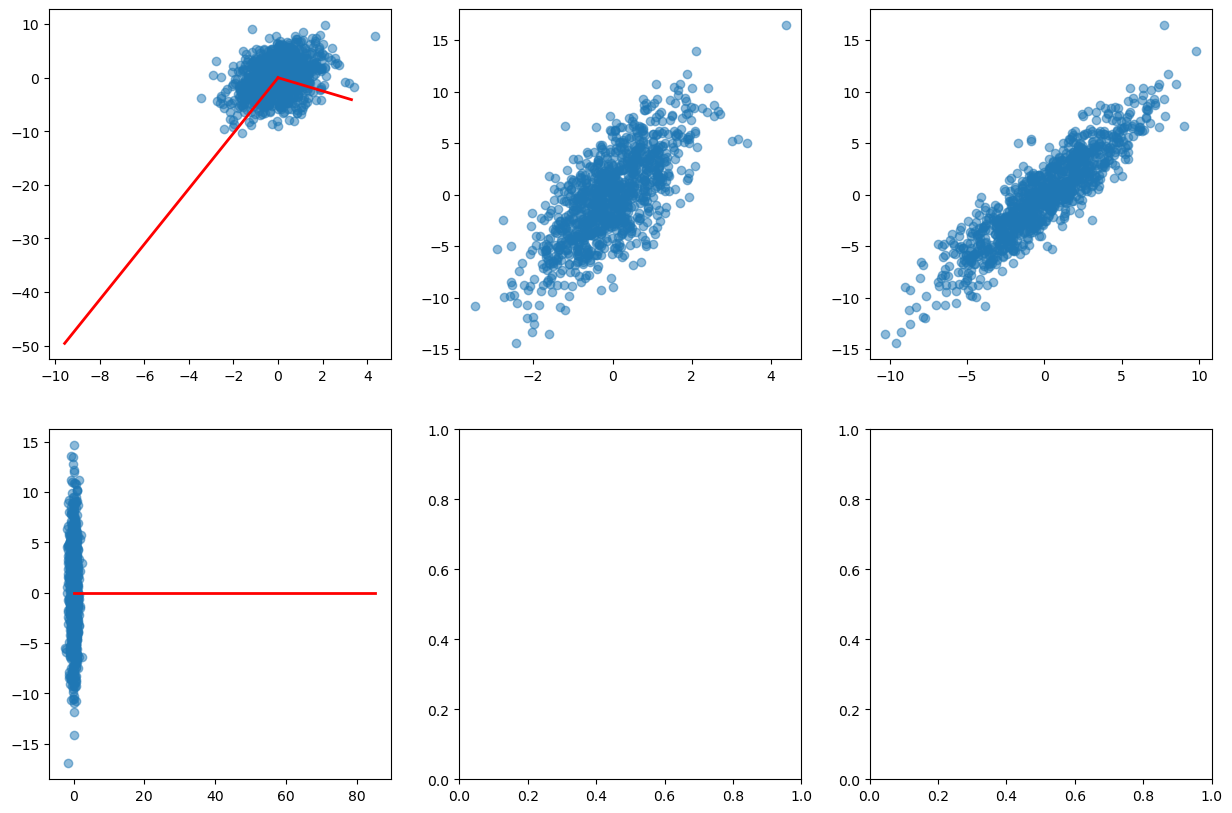

In [4]:
# Let's now take the eigenvectors as new basis vectors and redefine the data points w.r.t. this new basis.
cov_reduced = np.cov(data_reduced)
l_r, V_r = la.eig(cov_reduced)

data_new = np.dot(V_r.T, data_reduced)

fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

#plot original:

# the original data distribution
ax1.scatter(data[0,:], data[1,:], alpha=0.5)
ax2.scatter(data[0,:], data[2,:], alpha=0.5)
ax3.scatter(data[1,:], data[2,:], alpha=0.5)


# the new basis data distribution
# Only one plot is efficient as we now only have 2 components (no 3D dataset). 
ax4.scatter(data_new[0,:], data_new[1,:], alpha=0.5)


# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


for li, vi in zip(l,np.dot(V.T,V)):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax5.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax6.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

# We can see after PCA, we keeped the maximum of information by reducing the dimensionality of the data.
# Here, we just rotated the all data points represented by the component 1 and 3.
# PCA is used to project the input feature vectors to the main directions that maximises the variance (into the 2 axes). 
# In a second step, the PCA analysis would find a direction that is orthogonal to the first component(s) that it found.

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalue: (28.4195584819452+0j) ,	eigenvector: [-0.11225198 -0.5813612  -0.80586516]
Eigenvalue: (-1.1395507879054154e-16+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: (1.9374544060181653+0j) ,	eigenvector: [ 0.56633279 -0.70381282  0.42885275]
Eigenvalue: (28.4195584819452+0j) ,	eigenvector: [ 1.00000000e+00 -3.49461966e-16 -1.46535298e-16]
Eigenvalue: (-1.1395507879054154e-16+0j) ,	eigenvector: [-3.49461966e-16  1.00000000e+00 -2.52019649e-16]
Eigenvalue: (1.9374544060181653+0j) ,	eigenvector: [-1.46535298e-16 -2.52019649e-16  1.00000000e+00]


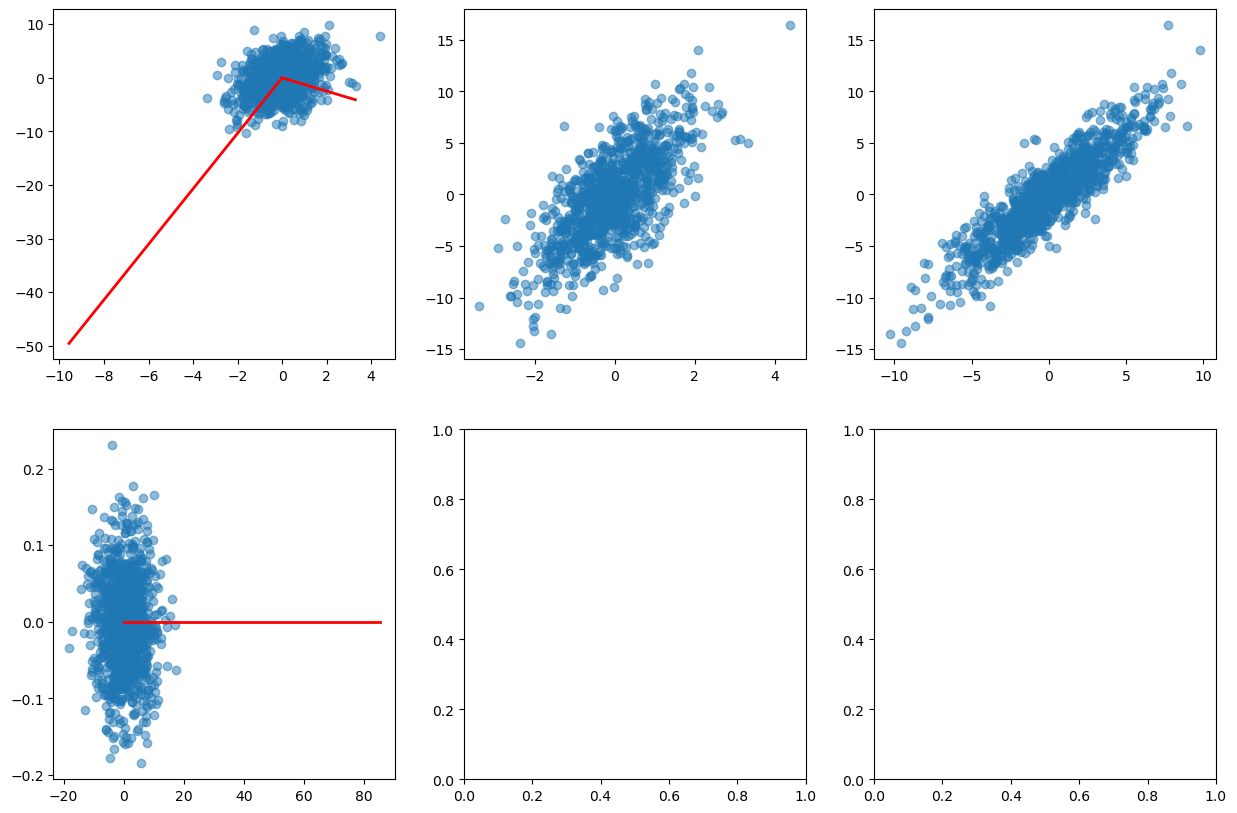

In [8]:
# factor of 20 : 1,2,4,5,10,20


noise = np.random.normal(loc = 0, scale = 0.02, size=(3,1000,10))
noise_data = data +np.sum(noise, axis=2)

U, s, Vt = la.svd(noise_data)
data_new = np.dot(V.T, noise_data)
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

#plot original:

# the original data distribution
ax1.scatter(noise_data[0,:], noise_data[1,:], alpha=0.5)
ax2.scatter(noise_data[0,:], noise_data[2,:], alpha=0.5)
ax3.scatter(noise_data[1,:], noise_data[2,:], alpha=0.5)

# the new basis data distribution
ax4.scatter(data_new[0,:], data_new[1,:], alpha=0.5)
#ax5.scatter(data_new[0,:], data_new[2,:], alpha=0.5)
#ax6.scatter(data_new[1,:], data_new[2,:], alpha=0.5)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


for li, vi in zip(l,np.dot(V.T,V)):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    #ax5.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    #ax6.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


# We can see that after PCA, the results are the same with and without noise, it's due to the fact PCA is used to denoise.
# Indeed, adding a little amount of noise to the data doesn't affect too much the principal components.


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-10 18:41:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'data/magic04.data.1'

magic04.data.1      100%[===================>]   1.41M  1.17MB/s    in 1.2s    

2023-01-10 18:41:12 (1.17 MB/s) - 'data/magic04.data.1' saved [1477391/1477391]

--2023-01-10 18:41:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: 'data/magic04.names.1'

magic04.names.1     100%[===================>]   5.27K 